In [40]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import AutoMinorLocator
import datetime as dt
import numpy as np
import gc
from sklearn import svm, preprocessing

In [41]:
pg = pd.read_csv('pg_view_1.csv')
pg['timestamp'] = pg['timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
del pg['Unnamed: 0']
del pg['rolling_avg']
pg.head()

,timestamp,pg_views
0,2006-11-29 15:42:00,157
1,2006-11-30 15:42:00,92
2,2006-12-01 15:42:00,87
3,2006-12-02 15:42:00,135
4,2006-12-03 15:42:00,213


In [42]:
df = pd.read_csv('pg_view_tag_perc_breakdown.csv')
df['timestamp'] = df['timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
del df['Unnamed: 0']
df.head()

,timestamp,action,christmas,halloween,horror,comedy,romance
0,2006-11-29 15:42:00,22.915341,0.000000,0.636537,5.092298,17.186505,16.549968
1,2006-11-30 15:42:00,40.173724,0.000000,0.000000,9.771987,34.744843,16.286645
2,2006-12-01 15:42:00,25.258324,0.000000,0.000000,5.740528,19.517796,10.332951
3,2006-12-02 15:42:00,18.504811,2.960770,0.000000,4.441155,19.245004,11.102887
4,2006-12-03 15:42:00,45.049273,0.469263,0.469263,7.977475,28.625059,17.362740


In [43]:
df.dtypes

timestamp    datetime64[ns]
action              float64
christmas           float64
halloween           float64
horror              float64
comedy              float64
romance             float64
dtype: object

Normalize 

In [44]:
tag = "horror"
X = np.array(df[tag].values)#.tolist()
X = preprocessing.scale(X)
df[tag+'n'] = X
# df[tag+'_ravg'] = df[tag].rolling(window=14,center=True).mean() 
print(X)

[-0.31397045  1.02147319 -0.12898489 ...  0.1841788   0.1454015
 -0.12158515]


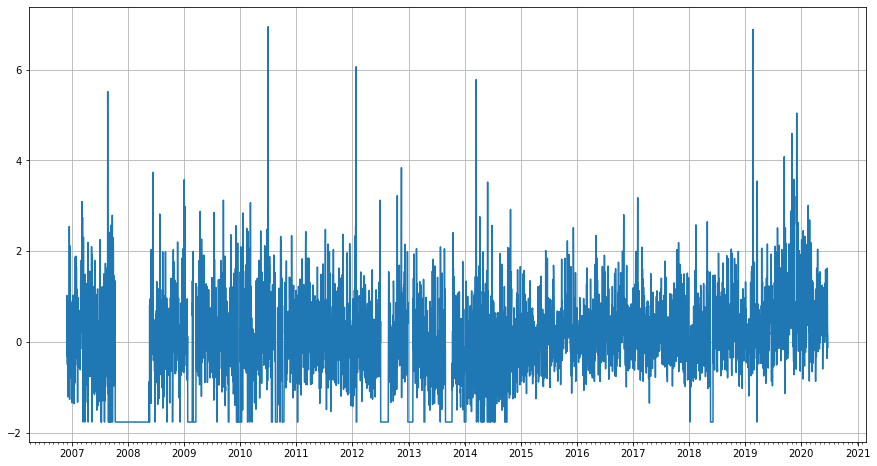

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
import matplotlib.dates as mdate
fig.set_size_inches(15,8)
ax.xaxis_date()
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.grid(which='major')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(12))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
#plt.plot(df['timestamp'], df['action'],label='action')
plt.plot(df['timestamp'], df[tag+'n'],label='ravg')
#plt.plot(df['timestamp'], df[tag],label='ravg')
